## Q1. What is the mathematical formula for a linear SVM?


The mathematical formula for a linear Support Vector Machine (SVM) is given by the decision function:

\[ f(x) = w \cdot x + b \]

where:
- \( w \) is the weight vector
- \( x \) is the input feature vector
- \( b \) is the bias term
- \( \cdot \) denotes the dot product


## Q2. What is the objective function of a linear SVM?


The objective function of a linear SVM is to minimize the following cost function:

\[ \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \max(0, 1 - y_i (w \cdot x_i + b)) \]

where:
- \( \frac{1}{2} \|w\|^2 \) is the regularization term to keep the model weights small
- \( C \) is the regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error
- \( y_i \) is the actual class label of the \(i\)-th training example
- \( x_i \) is the \(i\)-th training example
- \( \max(0, 1 - y_i (w \cdot x_i + b)) \) is the hinge loss function


## Q3. What is the kernel trick in SVM?


The kernel trick in SVM is a method used to transform the input data into a higher-dimensional space without explicitly computing the coordinates of the data in that space. It allows SVMs to create non-linear decision boundaries by applying a kernel function to the input data. Common kernel functions include:

- Linear Kernel: \( K(x_i, x_j) = x_i \cdot x_j \)
- Polynomial Kernel: \( K(x_i, x_j) = (x_i \cdot x_j + c)^d \)
- Radial Basis Function (RBF) Kernel: \( K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2) \)

The kernel trick enables SVMs to efficiently handle complex, non-linear relationships between data points.


## Q4. What is the role of support vectors in SVM? Explain with example.


Support vectors are the data points that lie closest to the decision boundary (or hyperplane) and are most critical in determining its position and orientation. They are the data points that the margin pushes up against, and the SVM algorithm uses them to maximize the margin between the two classes. The decision boundary is defined entirely by these support vectors.

### Example:
Consider a binary classification problem with two classes, where the data points are perfectly linearly separable. The SVM algorithm will find the optimal hyperplane that maximizes the margin between the two classes. The support vectors are the points that are closest to this hyperplane. These points are crucial because if they were removed, the position of the hyperplane would change.

### Graphical Example:
![Support Vectors](https://upload.wikimedia.org/wikipedia/commons/7/72/SVM_margin.png)
In the above diagram, the circles and squares are the data points belonging to two different classes. The solid line represents the decision boundary (hyperplane), while the dashed lines represent the margins. The circled points on the margin are the support vectors.


## Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin, and Hard margin in SVM.


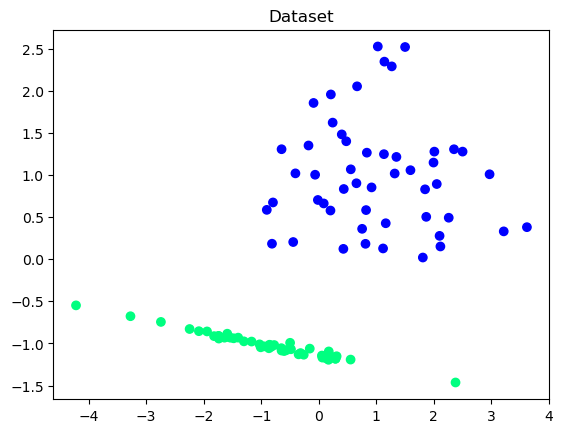

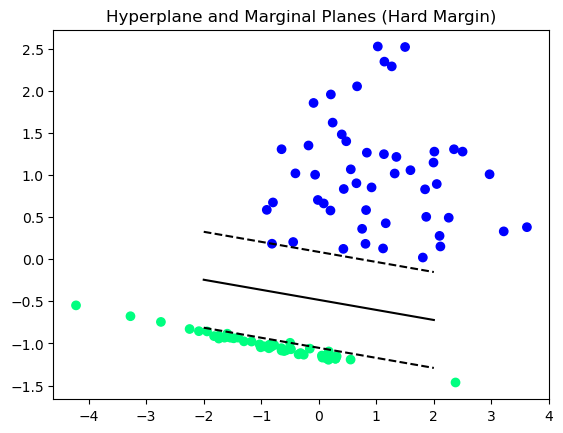

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.title('Dataset')
plt.show()

model = SVC(kernel='linear', C=1e10) 
model.fit(X, y)

w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 2)  

yy = a * xx - (model.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.title('Hyperplane and Marginal Planes (Hard Margin)')
plt.show()


## Q6. SVM Implementation through Iris dataset.
### Load the iris dataset from the scikit-learn library and split it into a training set and a testing set.


In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train a linear SVM classifier on the training set and predict the labels for the testing set.


In [7]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)


### Compute the accuracy of the model on the testing set.


In [8]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


### Plot the decision boundaries of the trained model using two of the features.


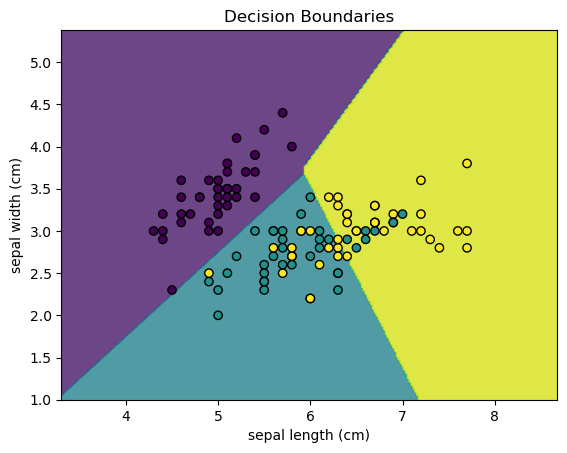

In [9]:
import numpy as np

def plot_decision_boundaries(X, y, model, feature_names):
    h = .02  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("Decision Boundaries")
    plt.show()

X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

svm_clf_2d = SVC(kernel='linear', C=1)
svm_clf_2d.fit(X_train_2d, y_train)

plot_decision_boundaries(X_train_2d, y_train, svm_clf_2d, iris.feature_names[:2])


### Try different values of the regularization parameter C and see how it affects the performance of the model.


In [11]:
C_values = [0.01, 0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    svm_clf = SVC(kernel='linear', C=C)
    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)  

    accuracy = np.mean(y_pred == y_test)  
    accuracies.append(accuracy)

for C, acc in zip(C_values, accuracies):
    print(f"C={C}: Accuracy = {acc:.2f}")


C=0.01: Accuracy = 0.97
C=0.1: Accuracy = 1.00
C=1: Accuracy = 1.00
C=10: Accuracy = 0.97
C=100: Accuracy = 1.00
